In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive")
if not os.path.exists('/content/gdrive/My Drive/tutorial_sawsen'):
    os.makedirs('tutorial_sawsen')
sys.path.append("/content/gdrive/My Drive/tutorial_sawsen")
# repertoire root du projet
ROOT_DIR = os.path.abspath(".")

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My\ Drive/tutorial_sawsen

/content/gdrive/My Drive/tutorial_sawsen


In [4]:
!git clone https://github.com/PhilChodrow/annotated_hypergraphs.git

fatal: destination path 'annotated_hypergraphs' already exists and is not an empty directory.


In [5]:
%cd /content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs/ahyper

/content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs/ahyper


In [6]:
!python ensemble.py

In [7]:
!python observables.py

In [8]:
!python utils.py

In [9]:
!python annotated_hypergraph.py

In [10]:
%cd /content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs/ahyper

/content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs/ahyper


In [11]:
import numpy as np
import json
import utils, annotated_hypergraph
with open('data/enron_hypergraph_annotated.json') as file:
    data = json.load(file)

roles = ['cc', 'from', 'to']

data[0:10]

[{'date': '1998-11-13 12:07:00', 'from': [67], 'to': [108], 'cc': []},
 {'date': '1998-11-19 15:19:00', 'from': [67], 'to': [73], 'cc': []},
 {'date': '1998-11-19 16:24:00', 'from': [67], 'to': [], 'cc': [73]},
 {'date': '1998-11-24 10:23:00',
  'from': [67],
  'to': [64],
  'cc': [108, 96, 22]},
 {'date': '1998-11-30 11:22:00', 'from': [67], 'to': [], 'cc': [66, 39]},
 {'date': '1998-12-02 11:47:00', 'from': [67], 'to': [86], 'cc': []},
 {'date': '1998-12-02 13:24:00', 'from': [67], 'to': [108], 'cc': []},
 {'date': '1998-12-03 19:38:00', 'from': [67], 'to': [108], 'cc': []},
 {'date': '1998-12-04 09:15:00', 'from': [67], 'to': [64], 'cc': []},
 {'date': '1998-12-09 09:14:00', 'from': [67], 'to': [108], 'cc': []}]

In [12]:
for record in data:
    for role in roles:
        # Vérifier si le champ contient une valeur itérable
        if isinstance(record[role], (list, tuple)):
            for item in record[role]:
                # Effectuer des opérations sur chaque élément de la liste ou du tuple
                print(item)
        else:
            # Traiter les valeurs qui ne sont pas itérables
            print("Le champ", role, "ne contient pas une valeur itérable :", record[role])


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
76
114
114
114
114
86
86
36
87
86
38
99
20
15
67
8
96
108
96
67
96
8
36
87
86
44
44
114
114
114
114
96
8
108
39
64
93
72
63
53
13
42
99
99
56
33
102
28
19
67
67
54
39
20
15
87
36
36
87
86
2
108
67
96
64
96
67
108
95
32
54
39
71
23
114
114
54
39
36
87
86
86
39
67
22
36
87
86
33
108
39
64
94
80
36
105
21
87
36
36
87
36
36
76
83
76
71
44
77
15
100
96
8
114
114
44
77
36
87
86
20
59
36
87
86
36
87
66
22
20
15
36
87
3
27
114
114
28
63
114
28
36
87
86
36
87
86
108
67
97
45
20
15
114
114
114
114
114
114
67
108
21
105
108
67
67
96
76
45
108
39
64
114
114
22
35
7
100
104
39
100
97
0
104
22
7
86
112
49
12
80
94
94
80
97
59
22
73
102
72
97
6
0
49
82
102
87
66
112
56
45
112
66
105
21
21
68
21
68
102
72
33
102
108
39
64
94
80
72
19
28
33
38
56
101
102
60
80
94
45
80
94
86
87
86
112
36
87
86
36
87
86
36
87
86
49
12
0
12
0
49
49
12
0
15
55
100
21
92
21
68
8
96
96
8
96
55
36
102
36
102
84
23
71
69
24
23
71
69
24
84
84
36
87
3

In [13]:
A = annotated_hypergraph.AnnotatedHypergraph.from_records(data, roles)

In [14]:
A.get_node_list()[0:10]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10])

représente un hypergraphe annoté. Elle récupère les dix premiers éléments de cette liste de nœuds, fournissant ainsi un aperçu des entités ou des éléments présents dans cet hypergraphe annoté.

In [15]:
A.get_edge_list()[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Ce code extrait les dix premiers éléments de la liste des arêtes de l'objet "A", qui représente un hypergraphe annoté. Ces arêtes représentent les connexions entre les nœuds de l'hypergraphe et fournissent des informations sur les relations ou les liens entre les entités présentes dans l'hypergraphe.

In [16]:
# degree sequence
print(A.node_degrees()) # get all node degrees (totals)
A.node_degrees(by_role = True)[4] # get the role-degrees of node 4

{73: 200, 108: 1548, 96: 1344, 22: 622, 66: 551, 39: 806, 15: 290, 100: 492, 64: 588, 106: 10, 86: 821, 67: 1478, 8: 860, 7: 172, 61: 14, 55: 310, 101: 51, 38: 64, 13: 42, 98: 7, 28: 181, 94: 274, 112: 320, 29: 9, 68: 195, 114: 1571, 97: 230, 49: 185, 105: 367, 12: 341, 35: 341, 102: 648, 19: 551, 57: 173, 87: 921, 17: 19, 80: 174, 84: 279, 63: 97, 33: 59, 45: 621, 21: 433, 59: 105, 71: 437, 53: 267, 44: 325, 40: 395, 31: 127, 99: 77, 52: 26, 109: 8, 36: 1163, 88: 143, 60: 160, 10: 117, 3: 114, 76: 185, 103: 27, 26: 50, 83: 257, 32: 153, 92: 50, 2: 38, 54: 219, 23: 411, 41: 51, 72: 321, 78: 320, 107: 36, 93: 87, 56: 52, 34: 60, 5: 35, 104: 35, 110: 89, 74: 19, 50: 21, 111: 6, 27: 182, 79: 30, 69: 15, 20: 383, 113: 10, 62: 27, 77: 52, 95: 43, 46: 167, 85: 72, 48: 5, 18: 98, 42: 17, 89: 19, 25: 74, 24: 60, 0: 38, 82: 40, 6: 28, 11: 23, 75: 10, 58: 48, 4: 17, 1: 18, 47: 3, 91: 22, 16: 36, 51: 2, 43: 3, 70: 14, 37: 9, 30: 16, 14: 2, 90: 2}


{'cc': 0, 'from': 12, 'to': 5}

In [17]:
A.get_IL()[0:10]

[NodeEdgeIncidence(nid=61, role=cc, eid=10503, meta={'date': '2001-11-01 13:07:00'}),
 NodeEdgeIncidence(nid=61, role=from, eid=10503, meta={'date': '2001-11-01 13:07:00'}),
 NodeEdgeIncidence(nid=36, role=from, eid=10502, meta={'date': '2001-07-31 19:13:00'}),
 NodeEdgeIncidence(nid=87, role=to, eid=10502, meta={'date': '2001-07-31 19:13:00'}),
 NodeEdgeIncidence(nid=36, role=from, eid=10501, meta={'date': '2001-07-31 16:59:00'}),
 NodeEdgeIncidence(nid=87, role=to, eid=10501, meta={'date': '2001-07-31 16:59:00'}),
 NodeEdgeIncidence(nid=36, role=from, eid=10500, meta={'date': '2001-07-31 15:42:00'}),
 NodeEdgeIncidence(nid=46, role=to, eid=10500, meta={'date': '2001-07-31 15:42:00'}),
 NodeEdgeIncidence(nid=36, role=from, eid=10499, meta={'date': '2001-07-31 11:33:00'}),
 NodeEdgeIncidence(nid=87, role=to, eid=10499, meta={'date': '2001-07-31 11:33:00'})]

In [18]:
d0 = A.node_degrees(by_role = True)
k0 = A.edge_dimensions(by_role = True)


In [19]:
A._stub_labeled_MCMC(n_steps = 100000)
A.get_IL()[0:10] # not the same list as above

[NodeEdgeIncidence(nid=78, role=cc, eid=10503, meta={'date': '2001-11-01 13:07:00'}),
 NodeEdgeIncidence(nid=23, role=from, eid=10503, meta={'date': '2001-11-01 13:07:00'}),
 NodeEdgeIncidence(nid=35, role=from, eid=10502, meta={'date': '2001-07-31 19:13:00'}),
 NodeEdgeIncidence(nid=15, role=to, eid=10502, meta={'date': '2001-07-31 19:13:00'}),
 NodeEdgeIncidence(nid=97, role=from, eid=10501, meta={'date': '2001-07-31 16:59:00'}),
 NodeEdgeIncidence(nid=96, role=to, eid=10501, meta={'date': '2001-07-31 16:59:00'}),
 NodeEdgeIncidence(nid=71, role=from, eid=10500, meta={'date': '2001-07-31 15:42:00'}),
 NodeEdgeIncidence(nid=84, role=to, eid=10500, meta={'date': '2001-07-31 15:42:00'}),
 NodeEdgeIncidence(nid=67, role=from, eid=10499, meta={'date': '2001-07-31 11:33:00'}),
 NodeEdgeIncidence(nid=3, role=to, eid=10499, meta={'date': '2001-07-31 11:33:00'})]

In [20]:
d = A.node_degrees(by_role = True)
k = A.edge_dimensions(by_role = True)

In [21]:
d0 == d, k0 == k # but the degree and dimension sequences are preserved

(True, True)

In [22]:
A.get_records()[0:3]

[{'cc': [], 'from': [80], 'to': [39], 'eid': 0, 'date': '1998-11-13 12:07:00'},
 {'cc': [],
  'from': [114],
  'to': [57],
  'eid': 1,
  'date': '1998-11-19 15:19:00'},
 {'cc': [96], 'from': [86], 'to': [], 'eid': 2, 'date': '1998-11-19 16:24:00'}]

In [23]:
A.get_IL()[0:4]

[NodeEdgeIncidence(nid=78, role=cc, eid=10503, meta={'date': '2001-11-01 13:07:00'}),
 NodeEdgeIncidence(nid=23, role=from, eid=10503, meta={'date': '2001-11-01 13:07:00'}),
 NodeEdgeIncidence(nid=35, role=from, eid=10502, meta={'date': '2001-07-31 19:13:00'}),
 NodeEdgeIncidence(nid=15, role=to, eid=10502, meta={'date': '2001-07-31 19:13:00'})]

In [24]:
from observables import local_role_density

In [25]:
A = annotated_hypergraph.AnnotatedHypergraph.from_records(data, roles)

densities = local_role_density(A, include_focus=False)
densities

{67: Counter({'to': 0.5376074498567335,
          'cc': 0.11353868194842406,
          'from': 0.34885386819484243}),
 108: Counter({'from': 0.13312101910828025,
          'cc': 0.13152866242038216,
          'to': 0.7353503184713376}),
 73: Counter({'from': 0.17114914425427874,
          'to': 0.6748166259168704,
          'cc': 0.15403422982885084}),
 96: Counter({'cc': 0.11622708985248101,
          'from': 0.24541797049620026,
          'to': 0.6383549396513187}),
 22: Counter({'cc': 0.08975175047740293,
          'from': 0.2138765117759389,
          'to': 0.6963717377466582}),
 64: Counter({'cc': 0.026019690576652602,
          'from': 0.41279887482419125,
          'to': 0.5611814345991561}),
 66: Counter({'cc': 0.2321291314373559,
          'from': 0.2275172943889316,
          'to': 0.5403535741737125}),
 39: Counter({'cc': 0.08820882088208822,
          'from': 0.355985598559856,
          'to': 0.5558055805580558}),
 86: Counter({'from': 0.2665655032878098,
          'cc': 0

In [26]:
def entropy(arr):
    return -sum([x*np.log2(x)/np.log2(len(arr)) for x in arr if x>0])

entropies = {key:entropy(list(v.values())) for key, v in densities.items()}
entropies


{67: 0.8629507941737384,
 108: 0.6929658141041597,
 73: 0.7788592250999151,
 96: 0.8023202419191464,
 22: 0.7265859533990632,
 64: 0.7139791628071661,
 66: 0.9179455860929882,
 39: 0.826775179307021,
 86: 0.7488125692975123,
 7: 0.8762198233246863,
 15: 0.8551745939624713,
 100: 0.75868357235704,
 41: 0.8721758207956711,
 8: 0.8890224608713345,
 106: -0.0,
 27: 0.7458023386071515,
 20: 0.7707264602885908,
 112: 0.9290352348139594,
 55: 0.8103218117102273,
 25: 0.7767603212278538,
 3: 0.925444526069557,
 105: 0.7993101864710465,
 78: 0.9213168380518127,
 57: 0.949332774520772,
 28: 0.9432274696214136,
 19: 0.9086405396654729,
 61: 0.9417346261113357,
 101: 0.8547172088523843,
 38: 0.936535739891787,
 13: 0.9348829324907597,
 98: 0.8342022886441014,
 93: 0.99717623659783,
 102: 0.8637337992885298,
 45: 0.9511664056957092,
 85: 0.576860863025612,
 72: 0.9167789736745987,
 21: 0.8113418211369021,
 30: 0.9513772003284718,
 35: 0.9354802540667477,
 44: 0.8380530409084131,
 36: 0.647173907638

In [27]:
import numpy as np
import json

import utils, annotated_hypergraph, observables
from matplotlib import pyplot as plt

import pandas as pd

import numpy as np
import networkx as nx


In [28]:
with open('data/enron_hypergraph_annotated.json') as file:
    data = json.load(file)

roles = ['cc', 'from', 'to']

A = annotated_hypergraph.AnnotatedHypergraph.from_records(data, roles)
A.remove_degeneracies(precedence = {'from' : 1, 'to' : 2, 'cc' : 3})
A.remove_singletons()

Removed 1246 node-edge incidences
Removed 901 singletons.


In [29]:
R = np.array([[0.0, 0.0, 0.0],
              [0.25, 0.0, 1.0],
              [0.0, 0.0, 0.0]])

R1 = np.ones((3,3))


In [30]:
%cd /content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs

/content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs


In [31]:
%cd /content/gdrive/MyDrive/tutorial_sawsen
%cd /content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs

/content/gdrive/MyDrive/tutorial_sawsen
/content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs


In [32]:
%cd /content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs/fig

/content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs/fig


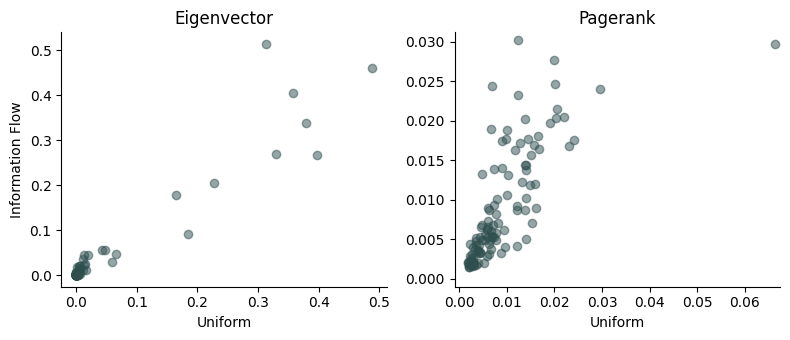

In [33]:
fig = plt.figure(figsize = (8, 3.5))

A.assign_role_interaction_matrix(R)
PR = observables.pagerank_centrality(A, weight = 'weight')
pr = [PR[i] for i in range(A.n)]

EIG = observables.eigenvector_centrality(A, weight = 'weight')
eig = [EIG[i] for i in range(A.n)]

A.assign_role_interaction_matrix(R1)
PR1 = observables.pagerank_centrality(A, weight = 'weight')
pr1 = [PR1[i] for i in range(A.n)]

EIG1 = observables.eigenvector_centrality(A, weight = 'weight')
eig1 = [EIG1[i] for i in range(A.n)]

ax1 = fig.add_subplot(121)
ax1.scatter(eig, eig1, c = 'darkslategrey', alpha = .5)
ax1.set(title = 'Eigenvector')
plt.xlabel('Uniform')
plt.ylabel('Information Flow')

ax2 = fig.add_subplot(122)
ax2.scatter(pr, pr1, c = 'darkslategrey', alpha = .5)
ax2.set(ylim = (-0.001,max(pr1)+.001), xlim = (-0.001, max(pr)+.001))

ax2.set(title = 'Pagerank')
plt.xlabel('Uniform')

for ax in [ax1, ax2]:
    for loc in ['right', 'top']:
        ax.spines[loc].set_visible(False)
        plt.tight_layout()

plt.savefig('centrality_dependence.pdf')

In [34]:
%cd /content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs/ahyper

/content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs/ahyper


In [35]:
!pip install python-ternary

In [36]:
import pandas as pd
import numpy as np
import networkx as nx
# import matplotlib.pyplot as plt
# %matplotlib inline
import ternary
import seaborn as sns

import annotated_hypergraph

import matplotlib.pyplot as plt

In [37]:
with open('data/enron_hypergraph_annotated.json') as file:
    data = json.load(file)

roles = ['cc', 'from', 'to']

A = annotated_hypergraph.AnnotatedHypergraph.from_records(data, roles)
A.remove_degeneracies(precedence = {'from' : 1, 'to' : 2, 'cc' : 3})
A.remove_singletons()

Removed 1246 node-edge incidences
Removed 901 singletons.


In [38]:
with open('data/enron_hypergraph_annotated.json') as file:
    data = json.load(file)

roles = ['cc', 'from', 'to']

A = annotated_hypergraph.AnnotatedHypergraph.from_records(data, roles)
A.remove_degeneracies(precedence = {'from' : 1, 'to' : 2, 'cc' : 3})
A.remove_singletons()

Removed 1246 node-edge incidences
Removed 901 singletons.


In [39]:
def get_partition(R, k, n_reps):

    A.assign_role_interaction_matrix(R)

    W_ = A.null_expectation_matrix()
    W = A.to_weighted_projection(as_matrix = True)

    # symmetrize
    Ws =  (W  + W.T) / 2
    Ws_ = (W_ + W_.T)/2

    best_Q = 0
    for i in range(n_reps):
        ell, Q = observables.multiway_spectral(Ws, Ws_, k)
        if Q > best_Q:
            best_Q = Q
            best_part = ell

    Q = best_Q
    ell = best_part
    return(Q, ell)

In [40]:
A.roles

['cc', 'from', 'to']

In [41]:
np.random.seed(555)
R = np.array([[0.0, 0.0, 0.0],
              [0.25, 0.0, 1.0],
              [0.0, 0.0, 0.0]])

Q, ell = get_partition(R, 4, 100)

print(Q)

0.5061295596570673


In [42]:
def reorder_labels(x):
    counts = np.bincount(x)
    lookup = np.argsort(np.argsort(-counts))
    return(np.array([lookup[i] for i in x]).astype(int))

ell = -reorder_labels(ell.astype(int))

In [43]:
import matplotlib.patches as patches

In [44]:
pip install matplotlib

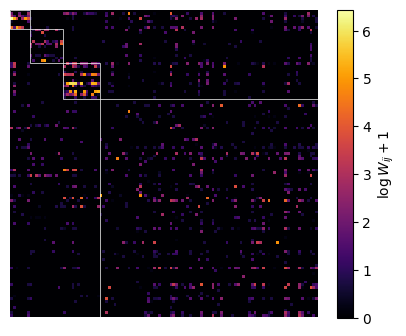

In [45]:
def degree_sort(A, d):
    row_sorted = A[np.argsort(d)]
    col_sorted = row_sorted[:, np.argsort(d)]
    return(col_sorted)

W = A.to_weighted_projection(as_matrix = True)

fig = plt.figure(figsize = (5, 4))
ax = fig.add_subplot(111)
im = ax.imshow(degree_sort(np.log(1+W), ell), cmap = 'inferno', interpolation = 'nearest')

ix1 = np.array([0,0])

for i in np.unique(ell):
    j = (ell == i).sum()
    rect = patches.Rectangle(ix1-.5,j,j,linewidth=.5,edgecolor='w',facecolor='none')
    ax.add_patch(rect)
    ix1 += np.array([j,j])

for loc in ['top', 'right', 'bottom', 'left']:
        ax.spines[loc].set_visible(False)

ax.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    right=False,
    left=False,
    labelbottom=False,
    labelleft=False,
    length = 0)

cbar = plt.colorbar(im)
cbar.ax.set_ylabel(r'$\log W_{ij} + 1$', rotation = 90)
image_path = '/content/gdrive/MyDrive/tutorial_sawsen/annotated_hypergraphs/fig/partition_matrix.png'
#plt.savefig('fig/partition_matrix.png', dpi = 300)

In [46]:
t = 0

threshed = W.copy()
threshed[threshed < t] = 0

H = nx.from_numpy_array(W, create_using = nx.DiGraph())
G = nx.from_numpy_array(threshed,create_using = nx.DiGraph())

isolates = list(nx.isolates(G))
G.remove_nodes_from(isolates)

nx.set_node_attributes(G,
                      {i : ell[i] for i in G.nodes},
                      'group')

In [47]:
from observables import local_role_density, node_role_participation

In [48]:
local_role_den = pd.DataFrame(local_role_density(A)).T
node_role_par = pd.DataFrame(node_role_participation(A)).T

/usr/local/lib/python3.10/dist-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


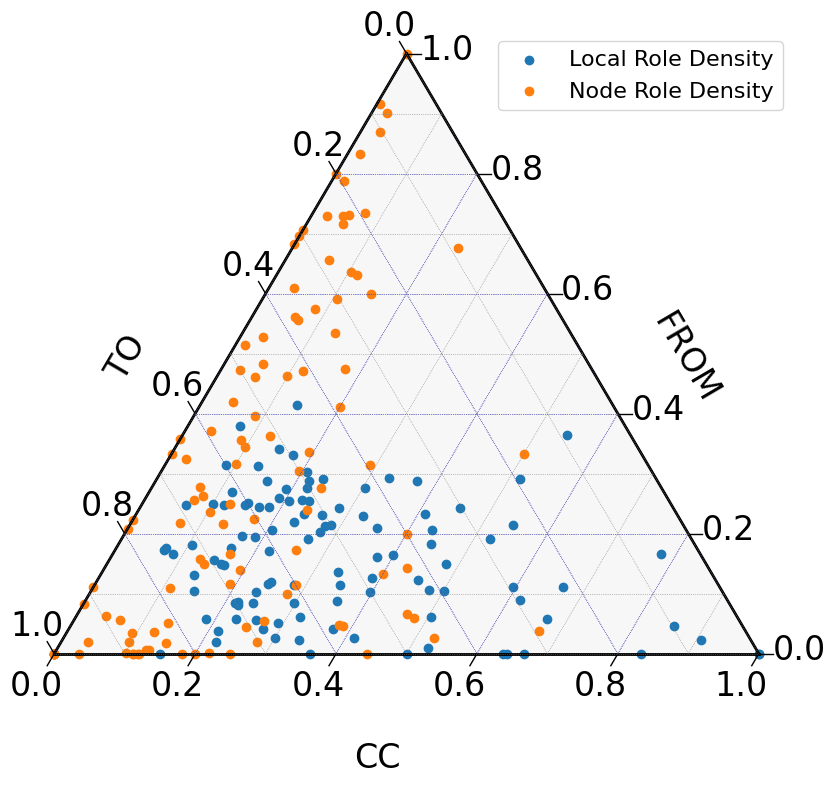

In [49]:
fig, tax = ternary.figure(scale=1)
fig.set_size_inches(10, 9)

tax.scatter(local_role_den.values, marker='o', color='C0', label="Local Role Density")
tax.scatter(node_role_par.values, marker='o', color='C1', label="Node Role Density")

tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.2, color="blue")

tax.ticks(ticks=[0,0.2,0.4,0.6,0.8,1], axis='lbr', linewidth=1,
          tick_formats='%.1f',
          fontsize=24,
          offset=0.02)
tax.left_axis_label("TO", offset=0.15, fontsize=24)
tax.right_axis_label("FROM", offset=0.15, fontsize=24)
tax.bottom_axis_label("CC", offset=0.15, fontsize=24)

fontsize = 16
offset = 0.15

tax.legend(fontsize=fontsize)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.1, color="gray")
tax.get_axes().axis('off')

tax.ax.axis('off');
tax._redraw_labels()

fig.savefig('../fig/roles_local_v_node.pdf', bbox_inches='tight')